# SAU-Explore

## Code usage

Let's look at a basic example of how to use the code. In this example we want to use *SAU-Neural-UCB* (SAU-UCB combined with at Neural Network) to tackle the the *Statlog bandit problem*, a contextual bandit problem based on the Shuttle Statlog Dataset in the UCI machine learning repository:

In [1]:
BANDIT_NAME = "statlog"
AGENT_NAME = "sauneural_ucb"
TIME_STEPS = 1000

Let us import the functions to load pre-implemented *contextual bandit problems* and *agents* (learning algorithms), and the *Deep Contextual Bandit Trainer* (which includes the architecture):

In [2]:
from run_bandit_experiment import load_agent, load_bandit
from lgenrl import DCBTrainer

Let us now load the Statlog bandit (which will also download the dataset is it's not already present in the folder `~/data/statlog`), load the SAU-Neural-UCB exploration algorithm, instantiated a trainer and use it to deploy the exploration algorithm:

In [3]:
bandit = load_bandit(BANDIT_NAME, download=True)
agent = load_agent(BANDIT_NAME, AGENT_NAME)

trainer = DCBTrainer(agent, bandit, logdir="./logs/example")
results = trainer.train(
    timesteps=TIME_STEPS, batch_size=64, update_after=20, update_interval=20, train_epochs=10
)


Started at 25-10-21 14:50:07
Training SAUNeuralAgent on StatlogDataBandit for 1000 timesteps
timestep                  regret/regret             reward/reward             regret/cumulative_regret  reward/cumulative_reward  regret/regret_moving_avg  reward/reward_moving_avg  
100                       1                         0                         38                        62                        0.1                       0.9                       
200                       0                         1                         46                        154                       0.06                      0.94                      
300                       0                         1                         47                        253                       0.0                       1.0                       
400                       0                         1                         48                        352                       0.02                      0.98              

Let us now finally look at the results by plotting the *average reward* (averaged over a moving window of 10 time steps) as a function of time step, and at the *average regret*:

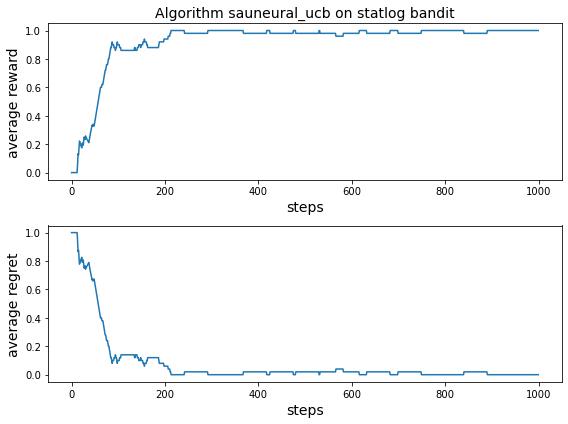

In [4]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.title(f"Algorithm {AGENT_NAME} on {BANDIT_NAME} bandit", fontsize=14)

plt.plot(results['reward_moving_avgs'])
plt.ylabel('average reward', fontsize=14)
plt.xlabel('steps', fontsize=14)

plt.subplot(2,1,2)
plt.plot(results['regret_moving_avgs'])
plt.ylabel('average regret', fontsize=14)

plt.xlabel('steps', fontsize=14)

plt.tight_layout()
plt.show()